References - https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

# Import Libraries

In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import classification_report

# Load data

In [2]:
X_train = np.load('../../Data/Train Test Dataset - Feature 30/X_train.npy')
X_test = np.load('../../Data/Train Test Dataset - Feature 30/X_test.npy')
y_train = np.load('../../Data/Train Test Dataset - Feature 30/y_train.npy')
y_test = np.load('../../Data/Train Test Dataset - Feature 30/y_test.npy')

# Load models

In [3]:
ann_model = load_model('../../H5 Files/Feature 30/ANN_Architecture_30_Features.h5')
lstm_model = load_model('../../H5 Files/Feature 30/LSTM_Architecture_30_Features.h5')
gru_model = load_model('../../H5 Files/Feature 30/GRU_Architecture_30_Features.h5')

# Get predicted probabilities from each base model

In [4]:
ann_prob = ann_model.predict(X_test)
lstm_prob = lstm_model.predict(X_test)
gru_prob = gru_model.predict(X_test)

4853/4853 [==============================] - 22s 4ms/step


# Define weights 

In [5]:
weights = [0.5, 0.25, 0.25]  # ANN: 50%, LSTM: 25%, GRU: 25%

# Perform Weighted Voting 

In [6]:
import time
start_time = time.time()

weighted_prob_test = (weights[0] * ann_prob + weights[1] * lstm_prob + weights[2] * gru_prob)
ensemble_pred_test = (weighted_prob_test > 0.5).astype(int).flatten()

end_time = time.time()

time_taken = end_time - start_time
print(f"Time taken for ensemble prediction: {time_taken:.6f} seconds")

Time taken for ensemble prediction: 0.002000 seconds


## Classification Report

In [7]:
classification_report = classification_report(y_test, ensemble_pred_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     77676
           1       0.91      0.88      0.90     77614

    accuracy                           0.90    155290
   macro avg       0.90      0.90      0.90    155290
weighted avg       0.90      0.90      0.90    155290



## Evaluation Metrics

In [8]:
# Calculate metrics
accuracy = accuracy_score(y_test, ensemble_pred_test)
precision = precision_score(y_test, ensemble_pred_test)
recall = recall_score(y_test, ensemble_pred_test)
f1 = f1_score(y_test, ensemble_pred_test)
auc_roc = roc_auc_score(y_test, weighted_prob_test)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8970893167621868
Precision: 0.9071140762269635
Recall: 0.8846857525704126
F1-score: 0.8957595444494452
AUC-ROC: 0.9640609614936606


# Confusion matrix

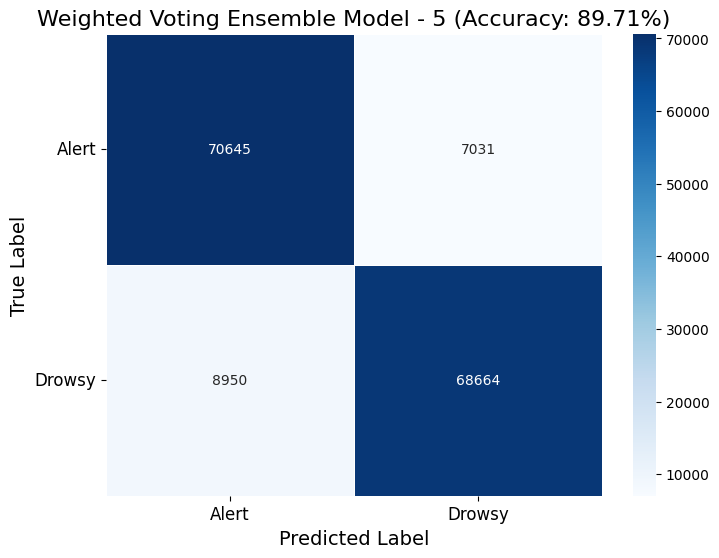

In [9]:
conf_matrix = confusion_matrix(y_test, ensemble_pred_test)
class_labels = ["Alert", "Drowsy"]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Weighted Voting Ensemble Model - 5 (Accuracy: {accuracy * 100:.2f}%)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# ROC Curve

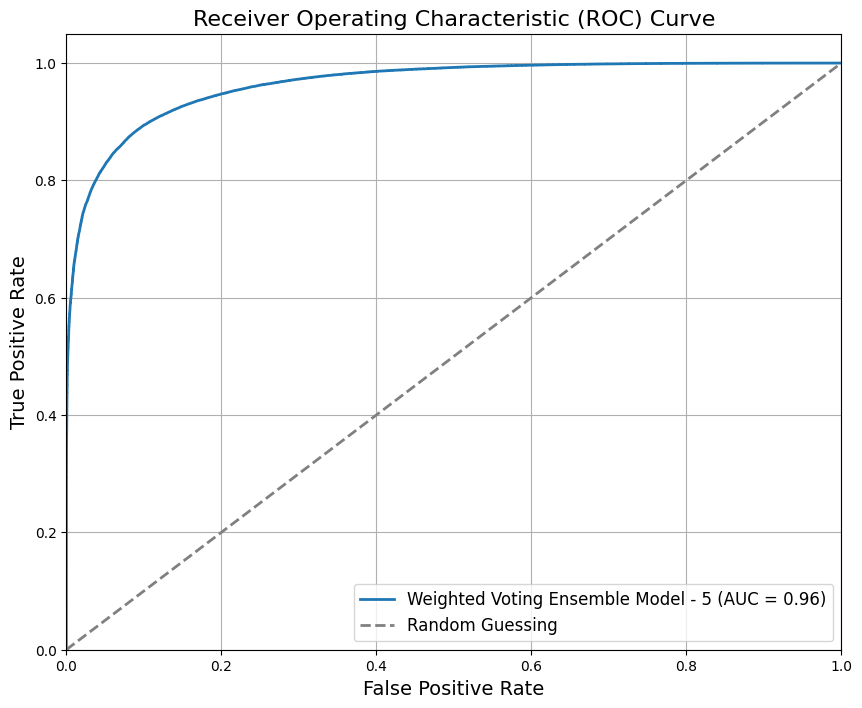

In [10]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, weighted_prob_test)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, lw=2, label=f'Weighted Voting Ensemble Model - 5 (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()